# Import Library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [24]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [25]:
df = pd.read_csv('kmeans_pollution.csv')

In [26]:
df.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Country_Freq,City_Freq,cluster_label
0,0.693147,3.610918,0.000000,3.951244,1241,1,3
1,0.693147,1.791759,0.693147,3.737670,1562,1,2
2,0.693147,3.688879,1.098612,4.204693,979,1,3
3,0.693147,3.555348,0.000000,3.044522,389,1,2
4,0.000000,3.135494,0.000000,1.945910,802,1,2


# Data Splitting

Data splitting pada klasifikasi ini menggunakan cross validation untuk menghindari terjadinya overfitting pada output nantinya

In [27]:
# Pisahkan fitur dan target
X = df.drop(columns=['cluster_label'])  
y = df['cluster_label']

In [28]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)  

Kode ini digunakan untuk memastikan bahwa data numerik pada kolom cluster_label berupa kategorikal

## Cross Validation

In [29]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pemilihan Model

Pada klasifikasi ini saya menggunakan 2 model klasifikasi yaitu knn dan decision tree, yang dimana nantinya kedua model ini akan dibadingkan berdasarkan akurasi yang dihasilkan dari berbagai macam metode evaluasi

In [30]:
# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(random_state=42)

# Prediksi dengan cross-validation
knn_pred = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
dt_pred = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

# Evaluasi Model

In [31]:
print("Akurasi tiap fold:", knn_pred)
print("Rata-rata akurasi:", knn_pred.mean())

Akurasi tiap fold: [0.97178207 0.97026264 0.9693944  0.97004558 0.9704797 ]
Rata-rata akurasi: 0.9703928803993922


In [32]:
print("Akurasi tiap fold:", dt_pred)
print("Rata-rata akurasi:", dt_pred.mean())

Akurasi tiap fold: [1.         0.99978294 0.99978294 1.         1.        ]
Rata-rata akurasi: 0.9999131756023443


2 cell code diatas menunjukkan hasil akurasi menggunakan cross validation. Berdasarkan hasil yang diberikan dapat kita lihat bahwa decision tree memberikan hasil yang lebih optimal dibandingkan dengan knn, **decision tree dengan score rata2 adalah 0,99 (hampir mendekati 1)** sementara **knn memberikan akurasi rata-rata sebesar 0,97**

In [34]:
from sklearn.model_selection import cross_val_predict

# Lakukan prediksi menggunakan cross-validation
knn_pred_cm = cross_val_predict(knn, X, y, cv=kf)
dt_pred_cm = cross_val_predict(dt, X, y, cv=kf)

# Hitung confusion matrix
knn_cm = confusion_matrix(y, knn_pred_cm)
dt_cm = confusion_matrix(y, dt_pred_cm)

## Confussion Matrix

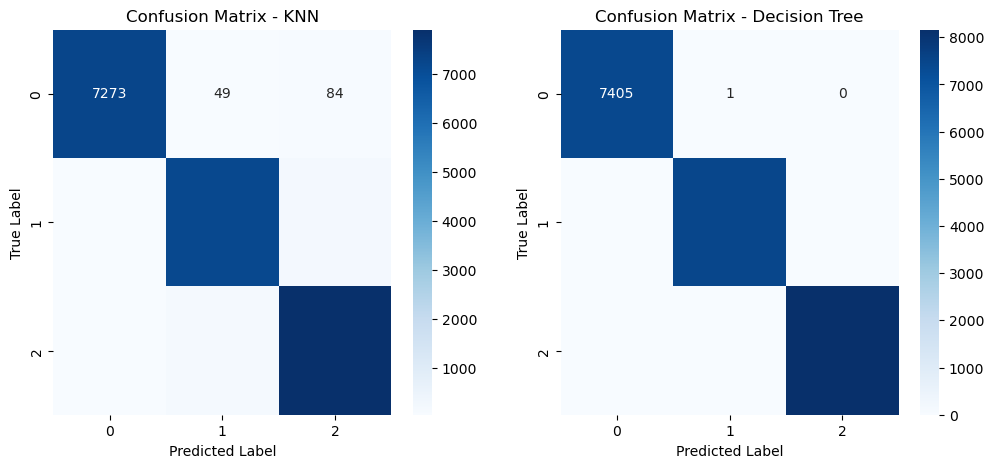

In [36]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - KNN")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - Decision Tree")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

Berdasarkan confusion matrix yang ditampilkan, dapat disimpulkan bahwa model **Decision Tree memiliki kinerja yang lebih baik dibandingkan KNN** dalam mengklasifikasikan data.  

Pada model **KNN**, meskipun sebagian besar data kelas **0** berhasil diklasifikasikan dengan benar (7,273 data), masih terdapat kesalahan klasifikasi, yaitu 49 data yang diklasifikasikan sebagai kelas **1** dan 84 data yang diklasifikasikan sebagai kelas **2**. Hal ini menunjukkan bahwa KNN belum sepenuhnya optimal dalam membedakan kelas, terutama untuk kelas **1** dan **2**.  

Sementara itu, model **Decision Tree** menunjukkan hasil yang lebih akurat, terutama dalam mengklasifikasikan data kelas **0**, di mana **7,405 data diklasifikasikan dengan benar**, dan hanya **1 data yang salah diklasifikasikan sebagai kelas 1**. Tidak ada kesalahan klasifikasi ke kelas **2**, yang mengindikasikan bahwa model ini memiliki kemampuan yang lebih baik dalam membedakan antar kelas dibandingkan KNN.  

## Precision, Recall, F1 Score

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='weighted'),
        recall_score(y_true, y_pred, average='weighted'),
        f1_score(y_true, y_pred, average='weighted')
    ]

# Buat DataFrame evaluasi
df_metrics = pd.DataFrame(
    [evaluate_model(y, knn_pred_cm), evaluate_model(y, dt_pred_cm)],
    index=["KNN", "Decision Tree"],
    columns=["Akurasi", "Precision", "Recall", "F1 Score"]
)

# Tampilkan hasil evaluasi
print("Tabel Evaluasi Model:")
display(df_metrics)

Tabel Evaluasi Model:


,Akurasi,Precision,Recall,F1 Score
KNN,0.970393,0.970408,0.970393,0.970393
Decision Tree,0.999913,0.999913,0.999913,0.999913


untuk hasil evaluasi pada code cell diatas memberikan hasil yang persis sama dengan akurasi cross validation yaitu 0,97 untuk KNN dan 0,99 untuk decision tree

# Kesimpulan

Secara keseluruhan, **Decision Tree lebih direkomendasikan dibandingkan KNN** karena memiliki tingkat kesalahan yang lebih rendah dan klasifikasi yang lebih akurat. Untuk meningkatkan performa KNN, dapat dilakukan **hyperparameter tuning** atau mencoba metode lain seperti **Random Forest atau SVM** untuk hasil yang lebih optimal.